In [23]:
import numpy as np
import pandas as pd

In [13]:
data = np.array([1, 0, 1, 1, 0, 0, 1, 0])
predict_prob = np.array([0.8, 0.2, 0.4, 0.4, 0.3, 0.6, 0.7, 0.1])

threshold = 0.5

In [14]:
predict = predict_prob >= threshold
predict

array([ True, False, False, False, False,  True,  True, False])

In [17]:
result = (predict == data)
result

array([ True,  True, False, False,  True, False,  True,  True])

In [19]:
confusion_matrix = np.zeros((2,2))
confusion_matrix

array([[0., 0.],
       [0., 0.]])

In [22]:
for idx in range(0, len(data)) :
    if data[idx] == True and predict[idx] == True :
         confusion_matrix[1][1] += 1
    elif data[idx] == True and predict[idx] == False :
         confusion_matrix[1][0] += 1
    elif data[idx] == False and predict[idx] == True :
         confusion_matrix[0][1] += 1
    elif data[idx] == False and predict[idx] == False :
         confusion_matrix[0][0] += 1
confusion_matrix

array([[3., 1.],
       [2., 2.]])

In [30]:
confusion_matrix = pd.DataFrame(confusion_matrix, columns=['pred_N', 'pred_P'], index=['res_N', 'res_P'])
confusion_matrix

,pred_N,pred_P
res_N,3.0,1.0
res_P,2.0,2.0


In [35]:
TN = confusion_matrix['pred_N']['res_N'] 
FN = confusion_matrix['pred_N']['res_P']
FP = confusion_matrix['pred_P']['res_N']
TP = confusion_matrix['pred_P']['res_P']

In [37]:
accuarcy = (TN + TP) / (TN + FP + FN + TP)
accuarcy

0.625

In [39]:
precision = (TP)/(TP + FP)
precision

0.6666666666666666

In [41]:
recall = TP / (FN + TP)
recall

0.5

In [44]:
f1 = 2 * (precision * recall) / (precision + recall)
f1

0.5714285714285715

In [45]:
import numpy as np

y_test = np.array([1, 0, 1, 1, 0, 0, 1, 0])
y_prob = np.array([0.8, 0.2, 0.4, 0.4, 0.3, 0.6, 0.7, 0.1])

# 추정 확률로 label을 결정한다.
def find_label(p, treshold = 0.5):
    label = (p > treshold).astype('uint8')
    return label

y_pred = find_label(y_prob, 0.5)

# Confusion matrix를 생성한다
cm = np.zeros([2, 2])
for a in [0, 1]:
    idx = np.where(y_test == a)
    for p in [0, 1]:
        cm[a, p] = (y_pred[idx] == p).sum()

# 평가 지표들을 계산한다.
tn = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]
tp = cm[1, 1]

accuracy = (tn + tp) / cm.sum()
precision = tp / cm[:, 1].sum()
recall = tp / cm[1, :].sum()
f1 = 2 * precision * recall / (precision + recall)

print(cm)
print('\naccuracy = %.3f' % accuracy)
print('precision =  %.3f' % precision)
print('recall =  %.3f' % recall)
print('f1 =  %.3f' % f1)


[[3. 1.]
 [2. 2.]]

accuracy = 0.625
precision =  0.667
recall =  0.500
f1 =  0.571


In [46]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(classification_report(y_test, y_pred))

print(' Accuracy = %.3f' % accuracy_score(y_test, y_pred))
print('   Recall = %.3f' % recall_score(y_test, y_pred, average='macro'))
print('Precision = %.3f' % precision_score(y_test, y_pred, average='macro'))
print(' F1-score = %.3f' % f1_score(y_test, y_pred, average='macro'))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.67      0.50      0.57         4

    accuracy                           0.62         8
   macro avg       0.63      0.62      0.62         8
weighted avg       0.63      0.62      0.62         8

 Accuracy = 0.625
   Recall = 0.625
Precision = 0.633
 F1-score = 0.619


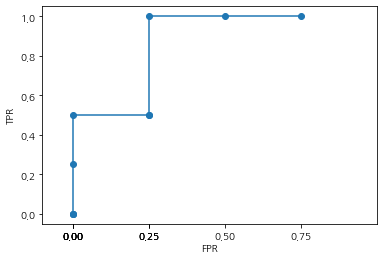

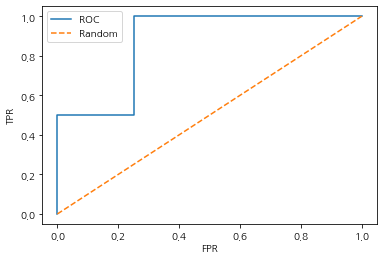

ROC AUC = 0.8750


In [73]:
import numpy as np
import matplotlib.pyplot as plt

y_test = np.array([1, 0, 1, 1, 0, 0, 1, 0])
y_prob = np.array([0.8, 0.2, 0.4, 0.4, 0.3, 0.6, 0.7, 0.1])

# 추정 확률로 label을 결정한다.
def find_label(p, treshold = 0.5):
    return (p > treshold).astype('uint8')

fpr, tpr = [], []
for thr in np.arange(0.1, 1.1, 0.1):
    y_pred = find_label(y_prob, thr)

    # Confusion matrix를 생성한다
    cm = np.zeros([2, 2])
    for a in [0, 1]:
        idx = np.where(y_test == a)
        for p in [0, 1]:
            cm[a, p] = (y_pred[idx] == p).sum()
    
    fpr.append(cm[0, 1] / cm[0, :].sum())
    tpr.append(cm[1, 1] / cm[1, :].sum())

# ROC curve를 그린다
plt.plot(fpr, tpr, marker='o')
plt.xticks(fpr)
plt.xlim(-0.1, 1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# ROC curve를 그린다
fprs, tprs, thresholds = roc_curve(y_test, y_prob)

plt.plot(fprs, tprs, label = 'ROC')
plt.plot([0,1], [0,1], '--', label = 'Random')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# AUC (Area Under Curve)를 계산한다
auc = roc_auc_score(y_test, y_prob)
print("ROC AUC = {0:.4f}".format(auc))

In [75]:
y_prob

array([0.8, 0.2, 0.4, 0.4, 0.3, 0.6, 0.7, 0.1])

In [87]:
import numpy as np
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

In [88]:
# iris = load_iris()
# x_train, x_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size = 0.2)

breast_cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(breast_cancer['data'], breast_cancer['target'], test_size = 0.2)


In [89]:
pipe = Pipeline(steps=[('model', SVC())])  # 임의 model로 pip를 초기화한다.
grid_params = [{'model':[SVC()],
                'model__kernel':['rbf'],
                'model__C':[0.1, 1.0, 10.0],
                'model__gamma':[0.1, 1.0, 5.0],
                'model__probability':[True],
               },
               
               {'model':[DecisionTreeRegressor()],
                'model__max_depth':[5, 10]},
                
               {'model':[KNeighborsClassifier()],
                'model__n_neighbors' : [5, 10]
               }   
              ]
grid = GridSearchCV(estimator=pipe, param_grid=grid_params, cv=5, refit=True)
grid.fit(x_train, y_train)
best_model = grid.best_estimator_

print("Best parameter = ", grid.best_params_)
print("Best test score = ", best_model.score(x_test, y_test))

Best parameter =  {'model': KNeighborsClassifier(), 'model__n_neighbors': 5}
Best test score =  0.9210526315789473


In [90]:
y_prob = best_model.predict_proba(x_test)
y_prob

array([[1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [0.6, 0.4],
       [0. , 1. ],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.2, 0.8],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. ,

In [98]:
y_prob[:,1]

array([0. , 0. , 1. , 0. , 0. , 1. , 1. , 1. , 0.8, 1. , 1. , 1. , 1. ,
       0. , 1. , 1. , 1. , 1. , 1. , 1. , 0. , 0.4, 0. , 1. , 0. , 0. ,
       0. , 1. , 0.4, 0. , 1. , 1. , 0. , 0.8, 1. , 1. , 0.8, 1. , 0.2,
       1. , 1. , 0.4, 1. , 0.8, 0.6, 0.8, 1. , 0. , 0. , 0. , 0. , 1. ,
       1. , 1. , 0. , 1. , 1. , 1. , 0. , 1. , 1. , 1. , 1. , 0.8, 1. ,
       1. , 1. , 0. , 0.6, 1. , 0.2, 1. , 1. , 0. , 0. , 0. , 0.8, 0. ,
       0. , 0.6, 1. , 1. , 1. , 0.8, 1. , 0.8, 1. , 0. , 1. , 0.2, 0.8,
       0. , 1. , 1. , 0. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.8, 0.4,
       0. , 1. , 1. , 0.8, 1. , 0.6, 0.4, 0.6, 1. , 1. ])

In [100]:
y_test

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1])

In [99]:
# roc_auc_score(y_test, y_prob, multi_class="ovo")
roc_auc_score(y_test, y_prob[:,1])

0.9567323755429334

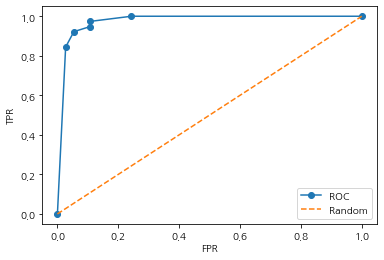

ROC AUC = 0.9760


In [101]:
# ROC AUC score 연습 코드
# ----------------------
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# 학습 데이터를 읽어온다.
cancer = load_breast_cancer()

# Train 데이터 세트와 Test 데이터 세트를 구성한다
x_train, x_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], test_size = 0.2)

# KNN 으로 Train 데이터 세트를 학습한다.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

# Test 세트의 Feature에 대한 class를 추정하고, 정확도를 계산한다
y_pred = knn.predict_proba(x_test)[:, 1]

# ROC curve를 그린다
fprs, tprs, thresholds = roc_curve(y_test, y_pred)

# thresholdsndarray of shape = (n_thresholds,)
# Decreasing thresholds on the decision function used to compute fpr and tpr. 
# thresholds[0] represents no instances being predicted and is arbitrarily set to max(y_score) + 1.
# y_pred = 1.0인 경우도 있을 수 있으므로 가장 큰 threshold는 1.0보다 크게 적용한 것 같음.

plt.plot(fprs, tprs, marker= 'o', label = 'ROC')
plt.plot([0,1], [0,1], '--', label = 'Random')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# AUC (Area Under Curve)를 계산한다
auc = roc_auc_score(y_test, y_pred)
print("ROC AUC = {0:.4f}".format(auc))